**Train Random Forest Model**

1. import Python packages and training data

In [5]:
# adding required libraries
import pandas as pd
import numpy as np

2. Load the dataset for model training

In [6]:
# Load the data from csv
x_data =pd.read_csv('../data/interim/x_data.csv')
y_data =pd.read_csv('../data/interim/y_data.csv')
x_oversample =pd.read_csv('../data/interim/x_oversample.csv')
y_oversample =pd.read_csv('../data/interim/y_oversample.csv')
x_undersample =pd.read_csv('../data/interim/x_undersample.csv')
y_undersample =pd.read_csv('../data/interim/y_undersample.csv')
x_test =pd.read_csv('../data/interim/x_test.csv')
y_test =pd.read_csv('../data/interim/y_test.csv')


3. Set up baseline model

In [7]:
# find the most occuring value and use it as base model
y_mode = y_data.mode()
y_shape = (len(x_data), 1)
y_base = np.full(y_shape, y_mode)

In [8]:
# calculate the accuracy score of the base model
from sklearn.metrics import accuracy_score
accuracy_score(y_data, y_base)

0.833125

4. Train Random Forest model

In [9]:
from sklearn.ensemble import RandomForestClassifier
datasets = [(x_data, y_data), (x_oversample, y_oversample), (x_undersample, y_undersample)]
models = []

for i, (x, y) in enumerate(datasets):
    rf_model = RandomForestClassifier(random_state=8)
    rf_model.fit(x, y.values.ravel())
    models.append(rf_model)
    print(f'Training score for dataset {i+1}: {rf_model.score(x, y)}')
    print(f'Test score for dataset {i+1}: {rf_model.score(x_test, y_test)}')
    print(f'Accuracy for dataset {i+1}: {accuracy_score(y_test, rf_model.predict(x_test))}')

# Accessing the models
rf_model_org = models[0]
rf_model_over = models[1]
rf_model_under = models[2]

Training score for dataset 1: 1.0
Test score for dataset 1: 0.83125
Accuracy for dataset 1: 0.83125
Training score for dataset 2: 1.0
Test score for dataset 2: 0.8
Accuracy for dataset 2: 0.8
Training score for dataset 3: 1.0
Test score for dataset 3: 0.59875
Accuracy for dataset 3: 0.59875


5. Perform grid search for optimised parameters

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [4, 8, 16],
    'min_samples_leaf':[1, 2, 4]
}

best_params_list = []

for i, (x, y) in enumerate(datasets):
    rf = RandomForestClassifier(random_state=8)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(x, y.values.ravel())
    best_params = grid_search.best_params_
    best_params_list.append(best_params)
    print(f"Best parameters for dataset {i+1}: {best_params}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for dataset 1: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 200}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for dataset 2: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for dataset 3: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 100}


In [11]:
# For each dataset, use the best parameters to train a new model and evaluate its performance
best_models = []
for i, (x, y) in enumerate(datasets):
    best_params = best_params_list[i]
    rf_model = RandomForestClassifier(**best_params, random_state=8)
    rf_model.fit(x, y.values.ravel())
    best_models.append(rf_model)
    print(f'Training score for dataset {i+1}: {rf_model.score(x, y)}')
    print(f'Test score for dataset {i+1}: {rf_model.score(x_test, y_test)}')
    print(f'Accuracy for dataset {i+1}: {accuracy_score(y_test, rf_model.predict(x_test))}')

Training score for dataset 1: 0.8475
Test score for dataset 1: 0.836875
Accuracy for dataset 1: 0.836875
Training score for dataset 2: 0.9991560390097525
Test score for dataset 2: 0.795625
Accuracy for dataset 2: 0.795625
Training score for dataset 3: 0.6877340823970037
Test score for dataset 3: 0.626875
Accuracy for dataset 3: 0.626875


5. Check feature importance

In [12]:
# get feature importance
for i, model in enumerate(best_models):
    # get feature importance
    feature_importance = model.feature_importances_

    # create a dataframe for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': datasets[i][0].columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # display the feature importance
    print(f"Feature importance for model {i+1}:")
    print(feature_importance_df)


Feature importance for model 1:
    Feature  Importance
0        GP    0.149951
5       FG%    0.083542
1       MIN    0.059203
8       3P%    0.056973
2       PTS    0.056672
11      FT%    0.055483
14      REB    0.052226
12     OREB    0.048376
9       FTM    0.047603
10      FTA    0.046572
3       FGM    0.045540
17      BLK    0.044384
13     DREB    0.044139
7       3PA    0.042043
4       FGA    0.041148
15      AST    0.036578
18      TOV    0.035667
6   3P Made    0.029240
16      STL    0.024660
Feature importance for model 2:
    Feature  Importance
17      BLK    0.117768
0        GP    0.103155
10      FTA    0.054938
12     OREB    0.054700
16      STL    0.054193
9       FTM    0.054152
11      FT%    0.051588
8       3P%    0.050038
5       FG%    0.049797
18      TOV    0.044511
3       FGM    0.044243
1       MIN    0.043283
13     DREB    0.042489
15      AST    0.041895
6   3P Made    0.040858
14      REB    0.040580
2       PTS    0.038378
7       3PA    0.037057


In [16]:
# Select only the required columns
selected_columns = ['GP', 'BLK']
datasets_selected = [(x[selected_columns], y) for x, y in datasets]

# Train and evaluate a model for each selected dataset using the best parameters
selected_best_models = []

for i, (x, y) in enumerate(datasets_selected):
    best_params = best_params_list[i]
    rf_model = RandomForestClassifier(**best_params, random_state=8)
    rf_model.fit(x, y.values.ravel())
    selected_best_models.append(rf_model)
    print(f'Training score for selected dataset {i+1}: {rf_model.score(x, y)}')
    print(f'Test score for selected dataset {i+1}: {rf_model.score(x_test[selected_columns], y_test)}')
    print(f'Accuracy for selected dataset {i+1}: {accuracy_score(y_test, rf_model.predict(x_test[selected_columns]))}')

Training score for selected dataset 1: 0.84203125
Test score for selected dataset 1: 0.8325
Accuracy for selected dataset 1: 0.8325
Training score for selected dataset 2: 0.8633720930232558
Test score for selected dataset 2: 0.78625
Accuracy for selected dataset 2: 0.78625
Training score for selected dataset 3: 0.6437265917602997
Test score for selected dataset 3: 0.61625
Accuracy for selected dataset 3: 0.61625


6. Exam the model

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

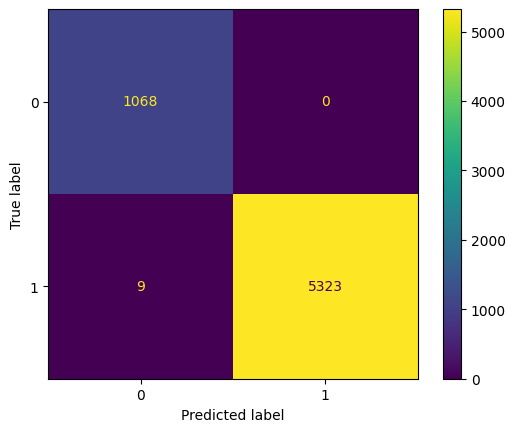

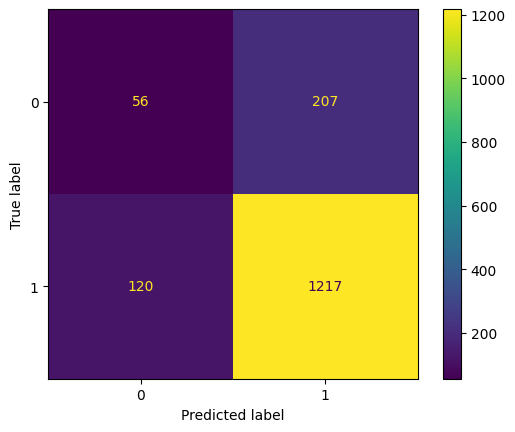

In [23]:
ConfusionMatrixDisplay.from_estimator(best_models[1], x_data, y_data)
ConfusionMatrixDisplay.from_estimator(best_models[1], x_test, y_test)

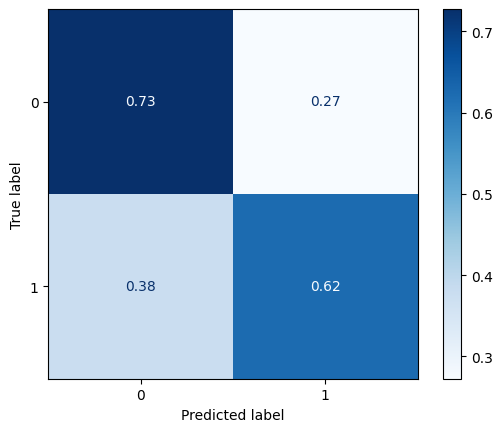

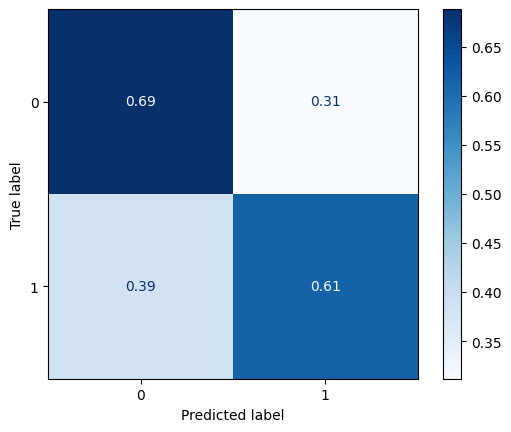

In [16]:
ConfusionMatrixDisplay.from_estimator(rf_model, x_data, y_data, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, cmap=plt.cm.Blues, normalize='true')

6. Conclusion
This is a better model compare to SVM model, but the accuracy is not high enough. 

7. Export Model

In [24]:
import joblib

# Export the Random Forest model
joblib.dump(rf_model, '../models/rf_model.pkl')

['../models/rf_model.pkl']